# Regression Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will build a Regression model to predict GDP/capita based on the 'balance' dataset prepared in 'data-cleaning-processing.ipynb'. This includes the more recent data so will be valid for the yeats 2010-2020 inclusive.

In [2]:
# source data https://ourworldindata.org/grapher/national-gdp-constant-usd-wb

gdp = pd.read_csv('raw data/national-gdp-constant-usd-wb.csv')
gdp.head()

,Entity,Code,Year,GDP (constant 2015 US$)
0,Afghanistan,AFG,2002,7555185000
1,Afghanistan,AFG,2003,8222480400
2,Afghanistan,AFG,2004,8338755600
3,Afghanistan,AFG,2005,9275174000
4,Afghanistan,AFG,2006,9772083000


In [3]:
gdp.columns = ['area','iso_alpha3_code','year','gdp']

gdp.head()

,area,iso_alpha3_code,year,gdp
0,Afghanistan,AFG,2002,7555185000
1,Afghanistan,AFG,2003,8222480400
2,Afghanistan,AFG,2004,8338755600
3,Afghanistan,AFG,2005,9275174000
4,Afghanistan,AFG,2006,9772083000


In [4]:
display(gdp.shape)
display(gdp.dtypes)
gdp.isna().sum()      # there are NaN values in the 'iso_alpha3_code' column

(10669, 4)

area               object
iso_alpha3_code    object
year                int64
gdp                 int64
dtype: object

area                 0
iso_alpha3_code    779
year                 0
gdp                  0
dtype: int64

In [5]:
# but we can see that these are largely for aggregated groups not present in the 'balance' dataset

gdp[gdp.iso_alpha3_code.isna()==True].area.value_counts()

East Asia and Pacific (WB)           62
High-income countries                62
Latin America and Caribbean (WB)     62
Lower-middle-income countries        62
Middle-income countries              62
North America (WB)                   62
South Asia (WB)                      62
Sub-Saharan Africa (WB)              62
Upper-middle-income countries        62
Europe and Central Asia (WB)         52
European Union (27)                  52
Middle East and North Africa (WB)    47
Low-income countries                 41
West Bank and Gaza                   28
Faeroe Islands                        1
Name: area, dtype: int64

In [6]:
# we can see good data coverage for countries in years that overlap with the 'balance' dataset

gdp[gdp.iso_alpha3_code.isna()==False].year.value_counts()

2015    209
2014    207
2013    207
2017    206
2011    206
       ... 
1961     92
1962     92
1963     92
1964     92
1960     88
Name: year, Length: 62, dtype: int64

In [7]:
gdp = gdp.drop(['area'], axis=1)

In [8]:
balance = pd.read_csv('presentation data/balance_national.csv', encoding='ISO-8859-1').drop(['Unnamed: 0'], axis = 1)
display(balance.shape)
balance.head()

(1980, 23)

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,...,animal_derived,requirement kcal_capita_day,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,prod_factor,exp_factor,imp_factor,loss_factor
0,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,6.333362e+10,2170.0,1.728687e+09,...,0.094931,5.253480e+10,6.355968e+10,6.703640e+08,2.391621e+10,7.652922e+09,1.209859,0.012760,0.455245,0.145673
1,Asia,Southern Asia,AFG,1,Afghanistan,2011,30117000.0,6.481178e+10,2152.0,1.746786e+09,...,0.092937,5.421060e+10,5.286058e+10,5.724542e+08,2.734222e+10,6.037477e+09,0.975097,0.010560,0.504370,0.111371
2,Asia,Southern Asia,AFG,1,Afghanistan,2012,31161000.0,6.727660e+10,2159.0,1.801729e+09,...,0.094488,5.608980e+10,6.858260e+10,5.292856e+08,2.387141e+10,8.377401e+09,1.222729,0.009436,0.425593,0.149357
3,Asia,Southern Asia,AFG,1,Afghanistan,2013,32270000.0,7.086492e+10,2196.0,1.862302e+09,...,0.092896,5.808600e+10,6.953667e+10,6.851397e+08,2.623184e+10,8.616138e+09,1.197133,0.011795,0.451603,0.148334
4,Asia,Southern Asia,AFG,1,Afghanistan,2014,33371000.0,7.558532e+10,2265.0,2.007933e+09,...,0.108609,6.006780e+10,7.438958e+10,1.140006e+09,2.753781e+10,8.963674e+09,1.238427,0.018979,0.458446,0.149226


In [9]:
display(balance.isna().sum())
balance.dtypes

region_name                               0
sub_region_name                           0
iso_alpha3_code                           0
least_developed_countries_ldc             0
area                                      0
year                                      0
population                                0
food_supply_kcal_per_day                  0
food_supply__kcal/capita/day              0
protein_supply_g_per_day                  0
protein_supply_quantity__g/capita/day     0
fat_supply_g_per_day                      0
fat_supply_quantity__g/capita/day         0
animal_derived                           60
requirement kcal_capita_day               0
prod_kcal_per_day                         0
export_kcal_per_day                       0
import_kcal_per_day                       0
loss_kcal_per_day                         0
prod_factor                              60
exp_factor                               60
imp_factor                               60
loss_factor                     

region_name                               object
sub_region_name                           object
iso_alpha3_code                           object
least_developed_countries_ldc              int64
area                                      object
year                                       int64
population                               float64
food_supply_kcal_per_day                 float64
food_supply__kcal/capita/day             float64
protein_supply_g_per_day                 float64
protein_supply_quantity__g/capita/day    float64
fat_supply_g_per_day                     float64
fat_supply_quantity__g/capita/day        float64
animal_derived                           float64
requirement kcal_capita_day              float64
prod_kcal_per_day                        float64
export_kcal_per_day                      float64
import_kcal_per_day                      float64
loss_kcal_per_day                        float64
prod_factor                              float64
exp_factor          

It appears that these NaNs are all for rows where 'population' is 0.

In [10]:
balance[balance.animal_derived.isna()==True]

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,...,animal_derived,requirement kcal_capita_day,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,prod_factor,exp_factor,imp_factor,loss_factor
121,Asia,Western Asia,BHR,0,Bahrain,2010,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
122,Asia,Western Asia,BHR,0,Bahrain,2011,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
123,Asia,Western Asia,BHR,0,Bahrain,2012,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
124,Asia,Western Asia,BHR,0,Bahrain,2013,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
125,Asia,Western Asia,BHR,0,Bahrain,2014,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
126,Asia,Western Asia,BHR,0,Bahrain,2015,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
127,Asia,Western Asia,BHR,0,Bahrain,2016,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
128,Asia,Western Asia,BHR,0,Bahrain,2017,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
129,Asia,Western Asia,BHR,0,Bahrain,2018,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
198,Asia,Southern Asia,BTN,1,Bhutan,2010,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
# for simplicity, we will just drop these 60 rows from the model
balance.drop(balance[balance.animal_derived.isna()==True].index, inplace = True)
balance

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,...,animal_derived,requirement kcal_capita_day,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,prod_factor,exp_factor,imp_factor,loss_factor
0,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,6.333362e+10,2170.0,1.728687e+09,...,0.094931,5.253480e+10,6.355968e+10,6.703640e+08,2.391621e+10,7.652922e+09,1.209859,0.012760,0.455245,0.145673
1,Asia,Southern Asia,AFG,1,Afghanistan,2011,30117000.0,6.481178e+10,2152.0,1.746786e+09,...,0.092937,5.421060e+10,5.286058e+10,5.724542e+08,2.734222e+10,6.037477e+09,0.975097,0.010560,0.504370,0.111371
2,Asia,Southern Asia,AFG,1,Afghanistan,2012,31161000.0,6.727660e+10,2159.0,1.801729e+09,...,0.094488,5.608980e+10,6.858260e+10,5.292856e+08,2.387141e+10,8.377401e+09,1.222729,0.009436,0.425593,0.149357
3,Asia,Southern Asia,AFG,1,Afghanistan,2013,32270000.0,7.086492e+10,2196.0,1.862302e+09,...,0.092896,5.808600e+10,6.953667e+10,6.851397e+08,2.623184e+10,8.616138e+09,1.197133,0.011795,0.451603,0.148334
4,Asia,Southern Asia,AFG,1,Afghanistan,2014,33371000.0,7.558532e+10,2265.0,2.007933e+09,...,0.108609,6.006780e+10,7.438958e+10,1.140006e+09,2.753781e+10,8.963674e+09,1.238427,0.018979,0.458446,0.149226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,Africa,Sub-Saharan Africa,ZWE,0,Zimbabwe,2016,14030330.0,2.968818e+10,2116.0,8.270880e+08,...,0.168715,2.525459e+10,5.629031e+10,1.201636e+09,1.627807e+10,2.908338e+09,2.228914,0.047581,0.644559,0.115161
1976,Africa,Sub-Saharan Africa,ZWE,0,Zimbabwe,2017,14236590.0,2.917077e+10,2049.0,8.287119e+08,...,0.165935,2.562586e+10,6.217495e+10,1.141580e+09,9.665559e+09,2.684212e+09,2.426258,0.044548,0.377180,0.104746
1977,Africa,Sub-Saharan Africa,ZWE,0,Zimbabwe,2018,14438800.0,2.988832e+10,2070.0,8.267657e+08,...,0.161836,2.598984e+10,6.875662e+10,1.128306e+09,8.275052e+09,2.990326e+09,2.645519,0.043413,0.318396,0.115058
1978,Africa,Sub-Saharan Africa,ZWE,0,Zimbabwe,2019,14645470.0,2.662546e+10,1818.0,7.674226e+08,...,0.180968,2.636185e+10,5.629540e+10,1.317420e+09,5.078003e+09,2.455614e+09,2.135488,0.049974,0.192627,0.093150


Combining the food availability data with the target GDP:

In [12]:
data = pd.merge(left = balance, right = gdp, how = 'left', on = ['iso_alpha3_code','year'])
display(data.shape)
data.head()

(1920, 24)

,region_name,sub_region_name,iso_alpha3_code,least_developed_countries_ldc,area,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,...,requirement kcal_capita_day,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,prod_factor,exp_factor,imp_factor,loss_factor,gdp
0,Asia,Southern Asia,AFG,1,Afghanistan,2010,29186000.0,6.333362e+10,2170.0,1.728687e+09,...,5.253480e+10,6.355968e+10,6.703640e+08,2.391621e+10,7.652922e+09,1.209859,0.012760,0.455245,0.145673,1.604789e+10
1,Asia,Southern Asia,AFG,1,Afghanistan,2011,30117000.0,6.481178e+10,2152.0,1.746786e+09,...,5.421060e+10,5.286058e+10,5.724542e+08,2.734222e+10,6.037477e+09,0.975097,0.010560,0.504370,0.111371,1.611631e+10
2,Asia,Southern Asia,AFG,1,Afghanistan,2012,31161000.0,6.727660e+10,2159.0,1.801729e+09,...,5.608980e+10,6.858260e+10,5.292856e+08,2.387141e+10,8.377401e+09,1.222729,0.009436,0.425593,0.149357,1.817151e+10
3,Asia,Southern Asia,AFG,1,Afghanistan,2013,32270000.0,7.086492e+10,2196.0,1.862302e+09,...,5.808600e+10,6.953667e+10,6.851397e+08,2.623184e+10,8.616138e+09,1.197133,0.011795,0.451603,0.148334,1.918925e+10
4,Asia,Southern Asia,AFG,1,Afghanistan,2014,33371000.0,7.558532e+10,2265.0,2.007933e+09,...,6.006780e+10,7.438958e+10,1.140006e+09,2.753781e+10,8.963674e+09,1.238427,0.018979,0.458446,0.149226,1.971207e+10


In [13]:
data['gdp_per_capita'] = data['gdp'] / data['population']

In [14]:
data.isna().sum()

region_name                               0
sub_region_name                           0
iso_alpha3_code                           0
least_developed_countries_ldc             0
area                                      0
year                                      0
population                                0
food_supply_kcal_per_day                  0
food_supply__kcal/capita/day              0
protein_supply_g_per_day                  0
protein_supply_quantity__g/capita/day     0
fat_supply_g_per_day                      0
fat_supply_quantity__g/capita/day         0
animal_derived                            0
requirement kcal_capita_day               0
prod_kcal_per_day                         0
export_kcal_per_day                       0
import_kcal_per_day                       0
loss_kcal_per_day                         0
prod_factor                               0
exp_factor                                0
imp_factor                                0
loss_factor                     

In [15]:
# some of the GDP data appears missing, so again we will simply drop those lines
data.drop(data[data.gdp.isna()==True].index, inplace = True)

In [16]:
# data.to_csv('presentation data/model_data.csv')

We now have a dataset on which to build a Regression Model.

### Scaling and Encoding

In [17]:
X = data.drop(['iso_alpha3_code','gdp','gdp_per_capita', 'area'], axis=1).copy()

y = data['gdp_per_capita']

In [18]:
X.dtypes

region_name                               object
sub_region_name                           object
least_developed_countries_ldc              int64
year                                       int64
population                               float64
food_supply_kcal_per_day                 float64
food_supply__kcal/capita/day             float64
protein_supply_g_per_day                 float64
protein_supply_quantity__g/capita/day    float64
fat_supply_g_per_day                     float64
fat_supply_quantity__g/capita/day        float64
animal_derived                           float64
requirement kcal_capita_day              float64
prod_kcal_per_day                        float64
export_kcal_per_day                      float64
import_kcal_per_day                      float64
loss_kcal_per_day                        float64
prod_factor                              float64
exp_factor                               float64
imp_factor                               float64
loss_factor         

In [19]:
X.region_name.value_counts(dropna=False)

Africa      530
Asia        454
Europe      418
Americas    374
Oceania     104
Name: region_name, dtype: int64

In [20]:
# there are more unique values in the 'sub_region_name' column, so we will group the lower frequency values
subregions = pd.DataFrame(X.sub_region_name.value_counts(normalize=True))
subregions

,sub_region_name
Sub-Saharan Africa,0.247872
Latin America and the Caribbean,0.187234
Western Asia,0.088830
Southern Europe,0.070213
Eastern Europe,0.058511
Northern Europe,0.058511
South-eastern Asia,0.052660
Southern Asia,0.047872
Western Europe,0.035106
Northern Africa,0.034043


In [22]:
# I'll group the lower frequency regions (less than 5% data each) into "Other"
less_freq_regions = subregions[subregions['sub_region_name']<0.05].index.tolist()

X["sub_region_name"].loc[X["sub_region_name"].isin(less_freq_regions)] = "Other"

X.sub_region_name.value_counts()

C:\Users\eliza\AppData\Local\Temp\ipykernel_19920\3273072459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sub_region_name"].loc[X["sub_region_name"].isin(less_freq_regions)] = "Other"


Sub-Saharan Africa                 466
Other                              444
Latin America and the Caribbean    352
Western Asia                       167
Southern Europe                    132
Eastern Europe                     110
Northern Europe                    110
South-eastern Asia                  99
Name: sub_region_name, dtype: int64

In [23]:
# this is categorical, but can be included in numericals for scaling
# it is also imbalanced, so we might improve by oversampling

X.least_developed_countries_ldc.value_counts()

0    1438
1     442
Name: least_developed_countries_ldc, dtype: int64

In [24]:
# this column will be treated as a categorical and OneHot encoded
X.year = X.year.astype('object')

In [25]:
X.year.value_counts()

2019    175
2020    174
2015    172
2014    171
2016    171
2017    171
2018    171
2013    170
2012    169
2010    168
2011    168
Name: year, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
y_train

,region_name,sub_region_name,least_developed_countries_ldc,year,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,...,animal_derived,requirement kcal_capita_day,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,prod_factor,exp_factor,imp_factor,loss_factor
1488,Oceania,Other,0,2018,196000.0,5.976040e+08,3049.0,1.704416e+07,86.96,2.714600e+07,...,0.259429,3.528000e+08,8.499564e+08,6.383253e+07,6.154436e+08,4.414293e+07,2.409173,0.180931,1.744455,0.125122
271,Africa,Sub-Saharan Africa,0,2017,537000.0,1.358610e+09,2530.0,3.791757e+07,70.61,3.521109e+07,...,0.170751,9.666000e+08,6.412906e+08,2.414889e+07,1.654317e+09,3.911690e+07,0.663450,0.024983,1.711481,0.040469
184,Africa,Sub-Saharan Africa,1,2016,10872000.0,2.981102e+10,2742.0,7.235316e+08,66.55,5.641481e+08,...,0.052152,1.956960e+10,5.485982e+10,2.515779e+09,2.286375e+10,5.736677e+09,2.803319,0.128555,1.168330,0.293142
846,Asia,Western Asia,0,2020,8655530.0,3.127243e+10,3613.0,1.087308e+09,125.62,1.266477e+09,...,0.235262,1.557995e+10,1.901379e+10,3.023518e+09,5.420439e+10,1.266605e+09,1.220401,0.194065,3.479111,0.081297
244,Europe,Eastern Europe,0,2019,7000120.0,1.997134e+10,2853.0,5.677797e+08,81.11,8.071138e+08,...,0.253768,1.260022e+10,1.290471e+11,8.982918e+10,1.952368e+10,4.433682e+09,10.241658,7.129178,1.549472,0.351874


1488     4576.394133
271      3228.749162
184      1082.458425
846     40644.838618
244      8206.184180
            ...     
1144     4394.982590
1318    13632.006048
874     34730.088682
1483     4127.751832
1140     3875.881254
Name: gdp_per_capita, Length: 1504, dtype: float64

In [27]:
X_train_num = X_train.select_dtypes(np.number).copy()
X_test_num = X_test.select_dtypes(np.number).copy()
X_train_cat = X_train.select_dtypes(object).copy()
X_test_cat = X_test.select_dtypes(object).copy()

In [28]:
# I will scale the numerical data with MinMax

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)

X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_train_num.columns)

X_train_scaled.head()

,least_developed_countries_ldc,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,fat_supply_quantity__g/capita/day,animal_derived,requirement kcal_capita_day,prod_kcal_per_day,export_kcal_per_day,import_kcal_per_day,loss_kcal_per_day,prod_factor,exp_factor,imp_factor,loss_factor
0,0.0,0.000127,0.000117,0.621099,0.000105,0.492829,0.000169,0.732517,0.554724,0.000127,0.000013,0.000041,0.000337,0.000015,0.070990,0.014231,0.124022,0.079591
1,0.0,0.000361,0.000275,0.392967,0.000241,0.350717,0.000222,0.301029,0.354709,0.000361,0.000010,0.000015,0.000922,0.000013,0.016889,0.001965,0.121616,0.025742
2,1.0,0.007442,0.006174,0.486154,0.004731,0.315428,0.003731,0.220092,0.087206,0.007442,0.000880,0.001597,0.012869,0.001900,0.083205,0.010112,0.081984,0.186470
3,0.0,0.005924,0.006477,0.869011,0.007113,0.828857,0.008391,0.778784,0.500213,0.005924,0.000305,0.001919,0.030524,0.000419,0.034149,0.015264,0.250594,0.051714
4,0.0,0.004789,0.004134,0.534945,0.003711,0.441982,0.005344,0.595255,0.541955,0.004789,0.002071,0.057021,0.010988,0.001468,0.313723,0.560744,0.109795,0.223829


In [29]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,1504.0,0.230718,0.421432,0.0,0.000000,0.000000,0.000000,1.0
population,1504.0,0.027700,0.099659,0.0,0.001967,0.006342,0.019890,1.0
food_supply_kcal_per_day,1504.0,0.024400,0.087623,0.0,0.001670,0.005438,0.016352,1.0
food_supply__kcal/capita/day,1504.0,0.542305,0.194710,0.0,0.399121,0.536923,0.703077,1.0
protein_supply_g_per_day,1504.0,0.021448,0.079946,0.0,0.001344,0.004549,0.013267,1.0
protein_supply_quantity__g/capita/day,1504.0,0.441257,0.175176,0.0,0.299761,0.443068,0.575728,1.0
fat_supply_g_per_day,1504.0,0.022253,0.080032,0.0,0.001598,0.004877,0.013039,1.0
fat_supply_quantity__g/capita/day,1504.0,0.433581,0.210752,0.0,0.264880,0.403325,0.587623,1.0
animal_derived,1504.0,0.383070,0.212976,0.0,0.206121,0.365035,0.552279,1.0
requirement kcal_capita_day,1504.0,0.027700,0.099659,0.0,0.001967,0.006342,0.019890,1.0


In [30]:
# I will encode the categoricals (excluding 'least_developed_countries_ldc') using OneHot

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_train_encode.head()

,region_name_Americas,region_name_Asia,region_name_Europe,region_name_Oceania,sub_region_name_Latin America and the Caribbean,sub_region_name_Northern Europe,sub_region_name_Other,sub_region_name_South-eastern Asia,sub_region_name_Southern Europe,sub_region_name_Sub-Saharan Africa,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
X_train_transformed = pd.concat([X_train_scaled,X_train_encode], axis = 1)
X_test_transformed = pd.concat([X_test_scaled,X_test_encode], axis = 1)

y_train = y_train.reset_index(drop=True)          
y_test = y_test.reset_index(drop=True)

display(y_train.head())
X_train_transformed.head()      # this is our training data

0     4576.394133
1     3228.749162
2     1082.458425
3    40644.838618
4     8206.184180
Name: gdp_per_capita, dtype: float64

,least_developed_countries_ldc,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,fat_supply_quantity__g/capita/day,animal_derived,requirement kcal_capita_day,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.0,0.000127,0.000117,0.621099,0.000105,0.492829,0.000169,0.732517,0.554724,0.000127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.000361,0.000275,0.392967,0.000241,0.350717,0.000222,0.301029,0.354709,0.000361,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.007442,0.006174,0.486154,0.004731,0.315428,0.003731,0.220092,0.087206,0.007442,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.005924,0.006477,0.869011,0.007113,0.828857,0.008391,0.778784,0.500213,0.005924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.004789,0.004134,0.534945,0.003711,0.441982,0.005344,0.595255,0.541955,0.004789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
X_test_transformed.head()      # this is our test/validation data

,least_developed_countries_ldc,population,food_supply_kcal_per_day,food_supply__kcal/capita/day,protein_supply_g_per_day,protein_supply_quantity__g/capita/day,fat_supply_g_per_day,fat_supply_quantity__g/capita/day,animal_derived,requirement kcal_capita_day,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.0,0.082463,0.078371,0.661538,0.070673,0.516471,0.077708,0.488936,0.437771,0.082463,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.001309,0.000883,0.263297,0.000548,0.120556,0.000731,0.257958,0.130036,0.001309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.037945,0.033375,0.558681,0.029596,0.446415,0.031918,0.427168,0.346660,0.037945,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.022581,0.017852,0.429451,0.014158,0.307345,0.014844,0.314933,0.153436,0.022581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.000356,0.000271,0.389451,0.000238,0.348718,0.000215,0.293516,0.337149,0.000356,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Regression Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression().fit(X_train_transformed, y_train)

y_pred = LR.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.7046187617298771

A moderate score, but we can certainly improve it.

In [34]:
#define a function to prepare data as above:

def yX_transform(X_train, X_test, y_train, y_test):  
    X_train_num = X_train.select_dtypes(np.number).copy()
    X_test_num = X_test.select_dtypes(np.number).copy()
    X_train_cat = X_train.select_dtypes(object).copy()
    X_test_cat = X_test.select_dtypes(object).copy()
    
    transformer = MinMaxScaler().fit(X_train_num)
    X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
    X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_train_num.columns)
    
    encoder = OneHotEncoder(drop='first').fit(X_train_cat)
    cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
    X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
    X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
    
    X_train_transformed = pd.concat([X_train_scaled,X_train_encode], axis = 1)
    X_test_transformed = pd.concat([X_test_scaled,X_test_encode], axis = 1)

    y_train = y_train.reset_index(drop=True)          # to realign the X and y datasets
    y_test = y_test.reset_index(drop=True)

    return X_train_transformed, X_test_transformed, y_train, y_test

### Improving the Dataset

In [35]:
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,1504.0,0.230718,0.421432,0.0,0.000000,0.000000,0.000000,1.0
population,1504.0,0.027700,0.099659,0.0,0.001967,0.006342,0.019890,1.0
food_supply_kcal_per_day,1504.0,0.024400,0.087623,0.0,0.001670,0.005438,0.016352,1.0
food_supply__kcal/capita/day,1504.0,0.542305,0.194710,0.0,0.399121,0.536923,0.703077,1.0
protein_supply_g_per_day,1504.0,0.021448,0.079946,0.0,0.001344,0.004549,0.013267,1.0
protein_supply_quantity__g/capita/day,1504.0,0.441257,0.175176,0.0,0.299761,0.443068,0.575728,1.0
fat_supply_g_per_day,1504.0,0.022253,0.080032,0.0,0.001598,0.004877,0.013039,1.0
fat_supply_quantity__g/capita/day,1504.0,0.433581,0.210752,0.0,0.264880,0.403325,0.587623,1.0
animal_derived,1504.0,0.383070,0.212976,0.0,0.206121,0.365035,0.552279,1.0
requirement kcal_capita_day,1504.0,0.027700,0.099659,0.0,0.001967,0.006342,0.019890,1.0


Clearly the population and the absolute kcal_per_day and g_per_day data are heavily skewed.

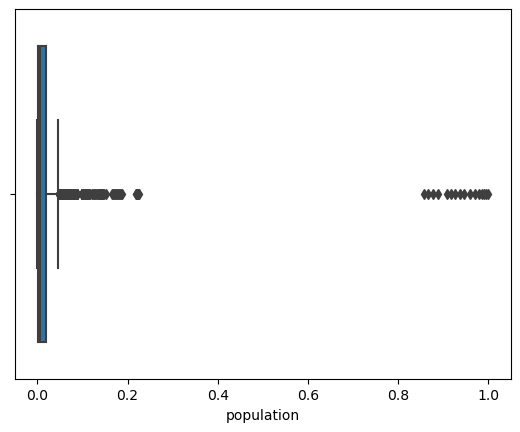

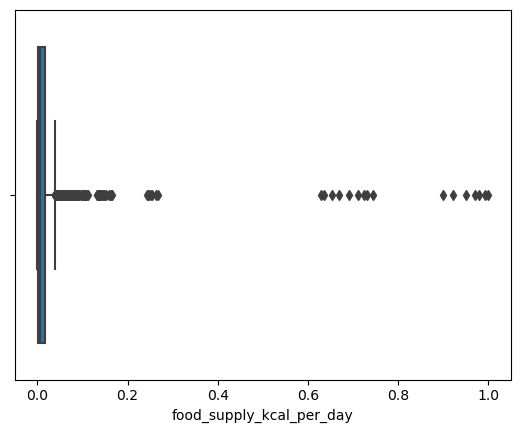

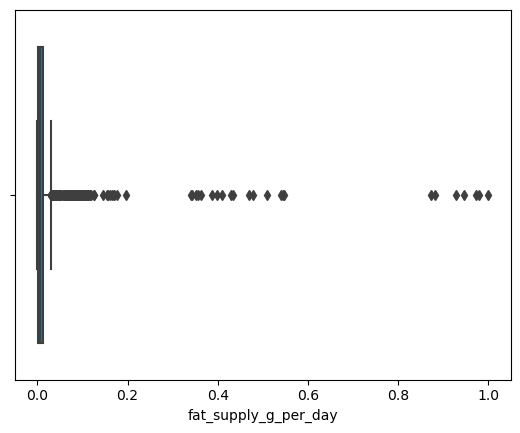

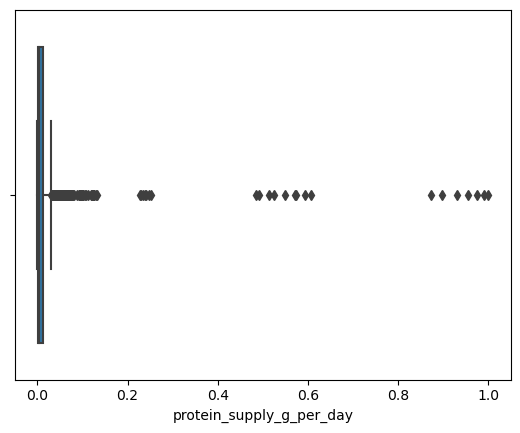

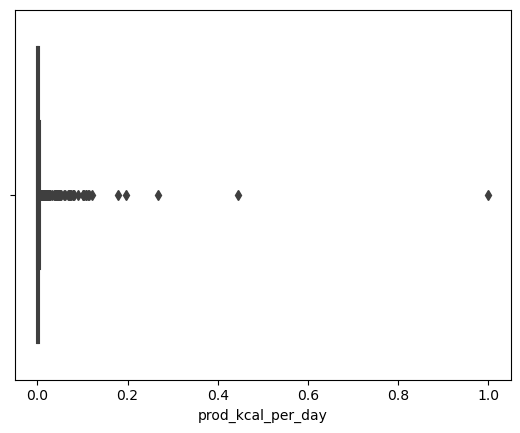

In [36]:
features = ['population','food_supply_kcal_per_day','fat_supply_g_per_day','protein_supply_g_per_day','prod_kcal_per_day']
for feat in features:
    sns.boxplot(data = X_train_transformed, x=feat)
    plt.show()

As we have per_capita values for these columns, I will drop the absolute values.

In [37]:
columns_to_drop = ['food_supply_kcal_per_day','fat_supply_g_per_day','protein_supply_g_per_day','prod_kcal_per_day',
                'export_kcal_per_day','import_kcal_per_day','loss_kcal_per_day']

We will also remove the index of the high population data from the training set. These come from China and India rows.

In [38]:
X_train[['population']].sort_values(by=['population'], ascending=False).head(20)

,population
349,1.459378e+09
348,1.452626e+09
347,1.445524e+09
346,1.438193e+09
345,1.430671e+09
343,1.415164e+09
341,1.399503e+09
791,1.380004e+09
790,1.366418e+09
789,1.352642e+09


In [39]:
drop_index = X_train[['population']].sort_values(by=['population'], ascending=False).head(16).index.tolist()

In [41]:
print('original X_train shape:', X_train.shape)
X_drop_train = X_train.drop(columns_to_drop, axis=1)
X_drop_train.drop(drop_index, inplace=True)
print('new X_train shape:', X_drop_train.shape)

y_drop_train = y_train.drop(drop_index, axis=0)
print('new y_train shape:', y_drop_train.shape)

X_drop_test = X_test.drop(columns_to_drop, axis=1)
X_drop_test.shape

original X_train shape: (1504, 21)
new X_train shape: (1488, 14)
new y_train shape: (1488,)


(376, 14)

In [42]:
X_drop_train_transformed, X_drop_test_transformed, y_drop_train, y_drop_test = yX_transform(X_drop_train, X_drop_test, y_drop_train, y_test)

In [43]:
# population is still heavily skewed but less so

X_drop_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,1488.0,0.233199,0.423010,0.0,0.000000,0.000000,0.000000,1.0
population,1488.0,0.079452,0.140873,0.0,0.008692,0.027643,0.084402,1.0
food_supply__kcal/capita/day,1488.0,0.542516,0.195067,0.0,0.400440,0.537582,0.703077,1.0
protein_supply_quantity__g/capita/day,1488.0,0.441395,0.175292,0.0,0.299783,0.443112,0.575576,1.0
fat_supply_quantity__g/capita/day,1488.0,0.434451,0.211290,0.0,0.265264,0.403798,0.589560,1.0
animal_derived,1488.0,0.383703,0.213576,0.0,0.206121,0.366267,0.554054,1.0
requirement kcal_capita_day,1488.0,0.079452,0.140873,0.0,0.008692,0.027643,0.084402,1.0
prod_factor,1488.0,0.136115,0.161033,0.0,0.037110,0.075789,0.181475,1.0
exp_factor,1488.0,0.096545,0.155324,0.0,0.005965,0.026100,0.122459,1.0
imp_factor,1488.0,0.105660,0.115805,0.0,0.034939,0.079629,0.135920,1.0


In [44]:
# we can see that there is 'population' data in the test set well above 1 as we only removed training data skews

X_drop_test_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
least_developed_countries_ldc,376.0,0.252660,0.435116,0.000000,0.000000,0.000000,1.000000,1.000000
population,376.0,0.149872,0.539918,0.000116,0.006298,0.029942,0.098783,4.471228
food_supply__kcal/capita/day,376.0,0.538324,0.189777,0.055824,0.415824,0.533407,0.688242,1.006593
protein_supply_quantity__g/capita/day,376.0,0.435962,0.166048,-0.009561,0.307106,0.439070,0.549978,0.856497
fat_supply_quantity__g/capita/day,376.0,0.436364,0.202720,0.001420,0.272009,0.416755,0.583304,1.000887
animal_derived,376.0,0.386516,0.203704,0.000101,0.229453,0.381920,0.549467,0.951530
requirement kcal_capita_day,376.0,0.149872,0.539918,0.000116,0.006298,0.029942,0.098783,4.471228
prod_factor,376.0,0.148948,0.222532,-0.000106,0.044432,0.080092,0.193661,3.249193
exp_factor,376.0,0.104615,0.169908,0.000001,0.007496,0.028336,0.122921,0.802033
imp_factor,376.0,0.102037,0.117093,-0.000212,0.035500,0.078424,0.120468,0.887777


In [45]:
display(X_train.shape)
display(X_train_transformed.shape)
display(y_train.shape)


display(X_drop_train.shape)
display(X_drop_train_transformed.shape)
display(y_drop_train.shape)


display(X_test_transformed.shape)
display(y_test.shape)

(1504, 21)

(1504, 39)

(1504,)

(1488, 14)

(1488, 32)

(1488,)

(376, 39)

(376,)

In [46]:
LR2 = LinearRegression().fit(X_drop_train_transformed, y_drop_train)

y_pred2 = LR2.predict(X_drop_test_transformed)

r2_score(y_drop_test, y_pred2)

0.28864601591438444

This appears to have significantly worsened the model!

Perhaps as we are now generating larger errors on the higher population validation data.

### Resampling

Using the original X dataset, I will resample the 'least_developed_countries_ldc' which make up 20-25% data. This should improve the accuracy of the model in the range covered by these countries.

In [48]:
from sklearn.utils import resample

train = pd.concat([X_train_transformed, y_train],axis=1)

display(train.head())

ldc = train[train['least_developed_countries_ldc']==1]
non_ldc = train[train['least_developed_countries_ldc']==0]

print('ldc:      ',len(ldc),' / ',round(100*len(ldc)/len(train),1),'%')
print('non_ldc:  ',len(non_ldc),' /  ',round(100*len(non_ldc)/len(train),1),'%')

,least_developed_countries_ldc,population,food_supply__kcal/capita/day,protein_supply_quantity__g/capita/day,fat_supply_quantity__g/capita/day,animal_derived,requirement kcal_capita_day,prod_factor,exp_factor,imp_factor,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,gdp_per_capita
0,0.0,0.000127,0.621099,0.492829,0.732517,0.554724,0.000127,0.070990,0.014231,0.124022,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4576.394133
1,0.0,0.000361,0.392967,0.350717,0.301029,0.354709,0.000361,0.016889,0.001965,0.121616,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3228.749162
2,1.0,0.007442,0.486154,0.315428,0.220092,0.087206,0.007442,0.083205,0.010112,0.081984,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1082.458425
3,0.0,0.005924,0.869011,0.828857,0.778784,0.500213,0.005924,0.034149,0.015264,0.250594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40644.838618
4,0.0,0.004789,0.534945,0.441982,0.595255,0.541955,0.004789,0.313723,0.560744,0.109795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8206.184180


ldc:       347  /  23.1 %
non_ldc:   1157  /   76.9 %


In [49]:
ldc_oversampled = resample(ldc, replace=True, n_samples = len(non_ldc), random_state=0)

display(ldc_oversampled.shape)
display(non_ldc.shape)

(1157, 33)

(1157, 33)

In [50]:
train_oversampled = pd.concat([ldc_oversampled,non_ldc],axis=0)
y_train_over = train_oversampled['gdp_per_capita'].copy()
X_train_over = train_oversampled.drop('gdp_per_capita',axis = 1).copy()

In [51]:
LR3 = LinearRegression().fit(X_train_over, y_train_over)

y_pred3 = LR3.predict(X_test_transformed)

r2_score(y_test, y_pred3)

0.7046716379334999

This hasn't significantly improved the score.

### Model Pipeline

I will now test different model families and then optimise the best one.

We will use the original training data.

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = KNeighborsRegressor()

In [55]:
model_pipeline = [model1, model2, model3]
model_names = ['Linear Regression', 'Decision Tree Regressor', 'KNR']

scores = {}
for model, model_name in zip(model_pipeline, model_names): # loop through two parallel lists
    score = cross_val_score(model, X_train_transformed, y_train, cv=5)
    scores[model_name] = score
print(scores)

{'Linear Regression': array([0.71799897, 0.7028372 , 0.62444553, 0.73339157, 0.71358815]), 'Decision Tree Regressor': array([0.9502577 , 0.90573117, 0.5646667 , 0.96993632, 0.94524591]), 'KNR': array([0.58583355, 0.54378015, 0.51237519, 0.600281  , 0.58200148])}


In [56]:
val_scores = {}
for model, model_name in zip(model_pipeline, model_names):
    model.fit(X_train_transformed, y_train)
    val_scores[model_name] = model.score(X_test_transformed, y_test)
print(val_scores)

{'Linear Regression': 0.701897151573961, 'Decision Tree Regressor': 0.9489414699182591, 'KNR': 0.537828005946422}


DecisionTreeRegressor is clearly the best.

### Parameter optimisation

Using DTR, we can optimise further by tuning parameters.

In [57]:
from sklearn.model_selection import GridSearchCV

max_depth_choices= [3,4,5,6,7,8,9,10,None]
criterion_choices = ['squared_error','absolute_error']
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [1,2,3,4,5,6,7,8,9,10]
max_features_choices = [2,3,4,5,6,None]

grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [58]:
from sklearn.model_selection import RandomizedSearchCV

model = DecisionTreeRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter=500, cv = 5, n_jobs=10)

In [59]:
%%time
random_search.fit(X_train_over, y_train_over)

random_search.best_score_

CPU times: total: 2.8 s
Wall time: 28.6 s


0.9114480091424955

In [60]:
random_search.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 6,
 'max_depth': None,
 'criterion': 'absolute_error'}

In [63]:
model4 = DecisionTreeRegressor(min_samples_split= 3,
                               min_samples_leaf= 1,
                               max_features= 6,
                               max_depth= None,
                               criterion= 'absolute_error').fit(X_train_over, y_train_over)

In [64]:
y_pred4 = model4.predict(X_test_transformed)

r2_score(y_test, y_pred4)

0.8569876523966462